# Part I - Ford GoBike System Data Exploration
## by Demilade Aliu

## Introduction
> This project demonstrates exploration of data visualization on the Ford GoBike System Data. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The exploration occur during and after the wrangling process. The Exploration is in 3 phase (Univariate, Bivariate and Multivariate) in order to understand patterns and relationships present in the data and build conclusions and findings.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
#load data
df=pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=['start_time'])

### Assessing the data 

#### Visual assessment

In [3]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


#### Programmatic assessment

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
91076,767,2019-02-16 10:26:25.216,2019-02-16 10:39:12.5750,20.0,Mechanics Monument Plaza (Market St at Bush St),37.7913,-122.399051,75.0,Market St at Franklin St,37.773793,-122.421239,5240,Subscriber,1986.0,Male,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [11]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Quality issues 

- missing values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Erroneous data type (start_time, end_time, start_station_id, end_station_id, bike_id  )
- Member birth is in float, but should be converted to integer

#### Tidiness 
- create a column for age, weekday, hour
- there is be a big difference between the mean and the maximum values of  duration and member birth year (investigate further)

### Cleaning

In [13]:
# make a copy of the original data 
df_copy=df.copy()

In [14]:
#drop null values 
df_copy.dropna(inplace=True)

In [15]:
# change data type 
#df_copy['start_time'] = pd.to_datetime(df_copy['start_time'], errors='coerce')
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])
df_copy['start_station_id'] = df_copy['start_station_id'].astype(str)
df_copy['end_station_id'] = df_copy['end_station_id'].astype(str)
df_copy['bike_id'] = df_copy['bike_id'].astype(str)
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype(int)

In [16]:
#create columns
#hour
df_copy['start_time_hour'] = df_copy['start_time'].dt.hour.astype(str)
#weekday
df_copy['weekday'] = df_copy['start_time'].dt.day_name()
#age
df_copy['today'] = pd.to_datetime("today")
df_copy['age']=df_copy['today'].dt.year.astype(str).astype(int) - df_copy['member_birth_year']

In [17]:
# drop columns
drop=['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude']
df_copy.drop(drop, axis=1,  inplace=True)

In [18]:
#test
#check data infomation again 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  start_time_hour 

In [19]:
df_copy.describe()

,duration_sec,member_birth_year,age
count,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,37.196865
std,1642.204905,10.118731,10.118731
min,61.000000,1878.000000,21.000000
25%,323.000000,1980.000000,30.000000
50%,510.000000,1987.000000,35.000000
75%,789.000000,1992.000000,42.000000
max,84548.000000,2001.000000,144.000000


### Structure of the dataset.

> The data set has been stored as a pandas dataframe, It has 16 columns and 174952 rows. The features cover 3 main areas:

- member details
- trip duration and time details
- station details 

### Interests.

> I'm most interested in figuring out how time(hour, day, month), age and duration of trip affects user type

##### Main Feautures 
- user_type

##### Supporting features

- time (day, hour)
- age
- duration

## Univariate Exploration

> Exploration of individual variables 

In [20]:
def x_y_t(xaxis, yaxis, title):
    #this function contains graph titles
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

#### User Type

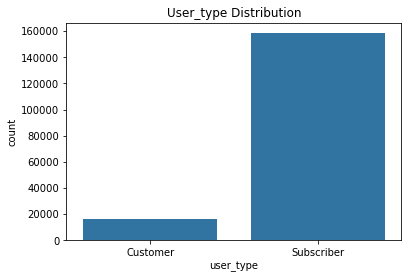

In [21]:
default_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'user_type', color = default_color)
x_y_t('user_type', 'count', 'User_type Distribution')
plt.show()

Significantly, most customer type are subscribers.

#### Age

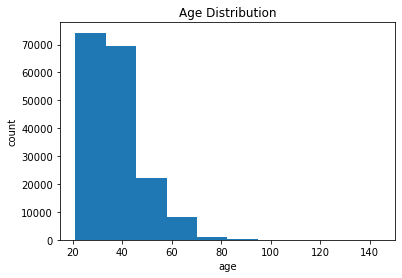

In [22]:
##age 
plt.hist(data = df_copy, x = 'age');
x_y_t('age', 'count', 'Age Distribution')

In [23]:
df_copy['age'].describe(percentiles = [.99])

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
50%          35.000000
99%          67.000000
max         144.000000
Name: age, dtype: float64

In [24]:
# keep events where riders were under 67 years of age
df_copy= df_copy[(df_copy['age']<=67)]

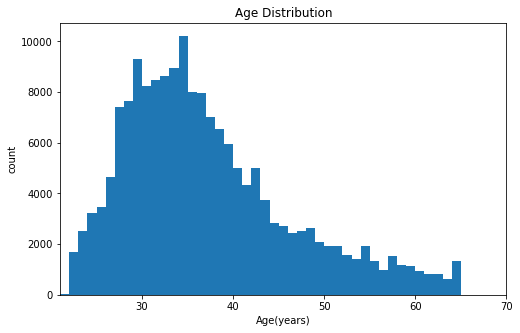

In [25]:
#the histogram is right skewed 
#there are outliers (70 and abpve )
#scale the chart and change binsize
bins=np.arange(df_copy['age'].min()-1, df_copy['age'].max()-1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'age', bins=bins)
plt.xlim(21, 70)
x_y_t('Age(years)', 'count', 'Age Distribution')
plt.show()

Age has a right skewed distribution, with most of the age roughly between 20 and 60 years. When scaled by changing the binsize and limiting the x axis, the age distribution is unimodal, peaking at around 30 years and 35 years.

#### Duration

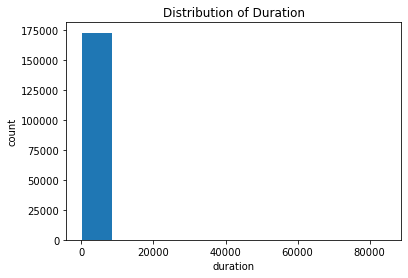

In [26]:
# duration
plt.hist(data = df_copy, x = 'duration_sec');
x_y_t('duration', 'count', 'Distribution of Duration')

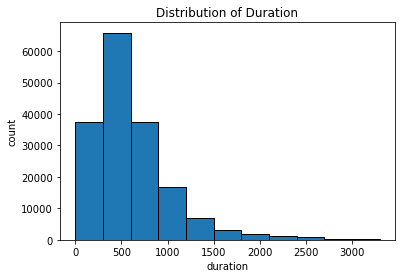

In [27]:
# use bins to set upper bound
bins = np.arange((df_copy['duration_sec'].min()//300)*300, df_copy['duration_sec'].quantile(0.99) + 300, 300)
#duration
plt.hist(data = df_copy, x = 'duration_sec', bins=bins, edgecolor='black');
x_y_t('duration', 'count', 'Distribution of Duration')

In [28]:
#duration
df_copy['duration_sec'].describe(percentiles = [.96])

count    173272.000000
mean        703.878549
std        1647.305625
min          61.000000
50%         510.000000
96%        1684.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [29]:
# keep events where riders duration is less than 1687
df_copy= df_copy[(df_copy['duration_sec']<=1686)]

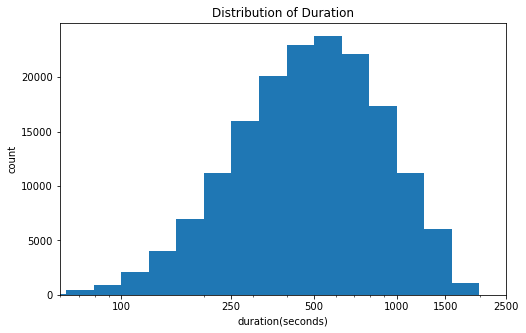

In [30]:
#there is a long tail on the distribution, hence we use log transform
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df_copy['duration_sec'].max())+log_binsize, log_binsize)

ticks = [100, 250, 500, 1000, 1500, 2500, 5000]
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(60,2500)
x_y_t('duration(seconds)', 'count', 'Distribution of Duration')

plt.show()

Duration has a long-tailed distribution, with a lot of members on the low duration end, and few on the high duration end. When plotted on a log-scale, the duration looks unimodal, with peak around 600-700.

#### Time and Gender

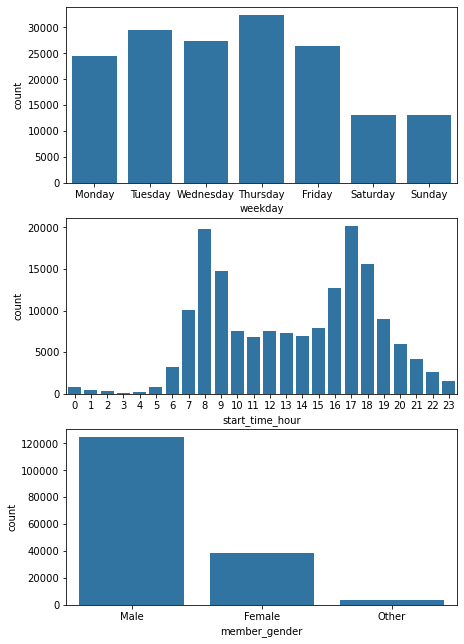

In [33]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = [str(x) for x in np.arange(0,24,1)]
#Other categorical variables
fig, ax = plt.subplots(nrows=3, figsize = [7, 11])

quant = ['weekday', 'start_time_hour', 'member_gender']
for i in range(len(quant)):
    var = quant[i]
    default_color = sb.color_palette()[0]
    if var == 'weekday':
        sb.countplot(data = df_copy, x = var, color = default_color, ax = ax[i], order=day)
    elif var == 'start_time_hour':
        sb.countplot(data = df_copy, x = var, color = default_color, ax = ax[i], order=hour_order)
    else:
        sb.countplot(data = df_copy, x = var, color = default_color, ax = ax[i])
plt.show()

### Discussion

> Age has a right skewed distribution, with most of the age roughly between 20 and 60 years. When scaled by changing the binsize and limiting the x axis, the age distribution is unimodal, peaking at around 30 years and 35 years.

> Duration has a long-tailed distribution, with a lot of members on the low duration end, and few on the high duration end. When plotted on a log-scale, the duration looks unimodal, with peak around 600-700.

> The day chart indicates there are more usage on weekdays compared to weekends, particularly on Thursdays and Tuesdays. Expectedly, there were low rides between (10pm to 4am) and most trips started at 5pm and 8am. It would be interesting to investing the trend of user type trip time 

## Bivariate Exploration

#### What is the relationship between the variable of interest(user type) against numerical variables (age and duration)?

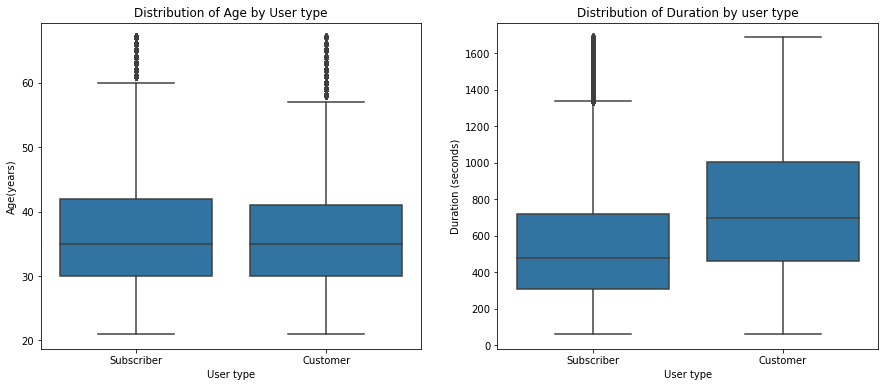

In [34]:
plt.figure(figsize = [15, 6])

#Age vs usertype
plt.subplot(1, 2, 1) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "user_type", y = "age", color = default_color);
x_y_t('User type','Age(years)',"Distribution of Age by User type")



#Duration vs usertype
plt.subplot(1, 2, 2) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "user_type", y = "duration_sec", color = default_color);
x_y_t('User type', 'Duration (seconds)',"Distribution of Duration by user type")


plt.show()

> Though there are more Subcribers, interestingly customer users take longer trips. It would be interesting to dive deep into what might be the causation. Also Subscribers are older than customers.

#### What is the relationship between the variable of interest(user type) against time?

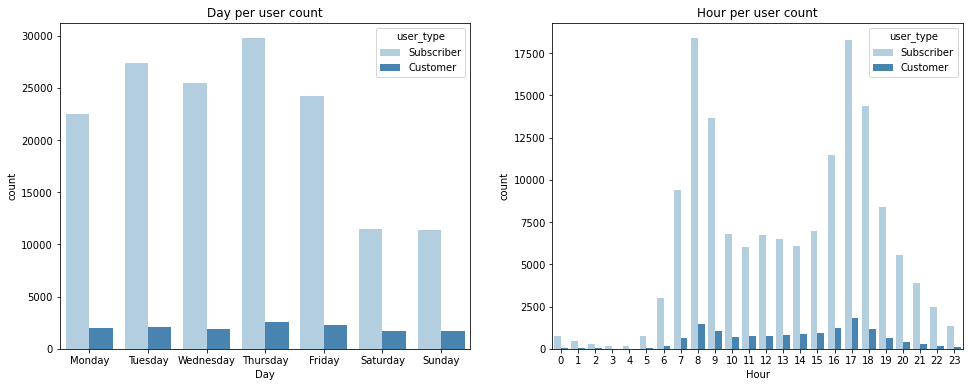

In [35]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = [str(x) for x in np.arange(0,24,1)]


plt.figure(figsize = [25, 6]) 


#User by Day count
plt.subplot(1, 3, 2)
sb.countplot(data = df_copy, hue = 'user_type', x = 'weekday', palette = 'Blues', order=day);
x_y_t('Day', 'count', 'Day per user count')


#Hour by user count
plt.subplot(1, 3, 3) 
sb.countplot(data = df_copy, x = 'start_time_hour', hue = 'user_type', palette = 'Blues', order=hour_order)
x_y_t('Hour', 'count', 'Hour per user count')

plt.show()

> Subscribers have a drop in bike usage on weekends, while theres really no difference in bike usage for all days for customers asides thursday.

> Subscribers take trips mostly during 8am and 5 pm which falls in working hour. customers take trips between 8am and 6pm

#### What is relationship between Time, Gender and Age and Duration?

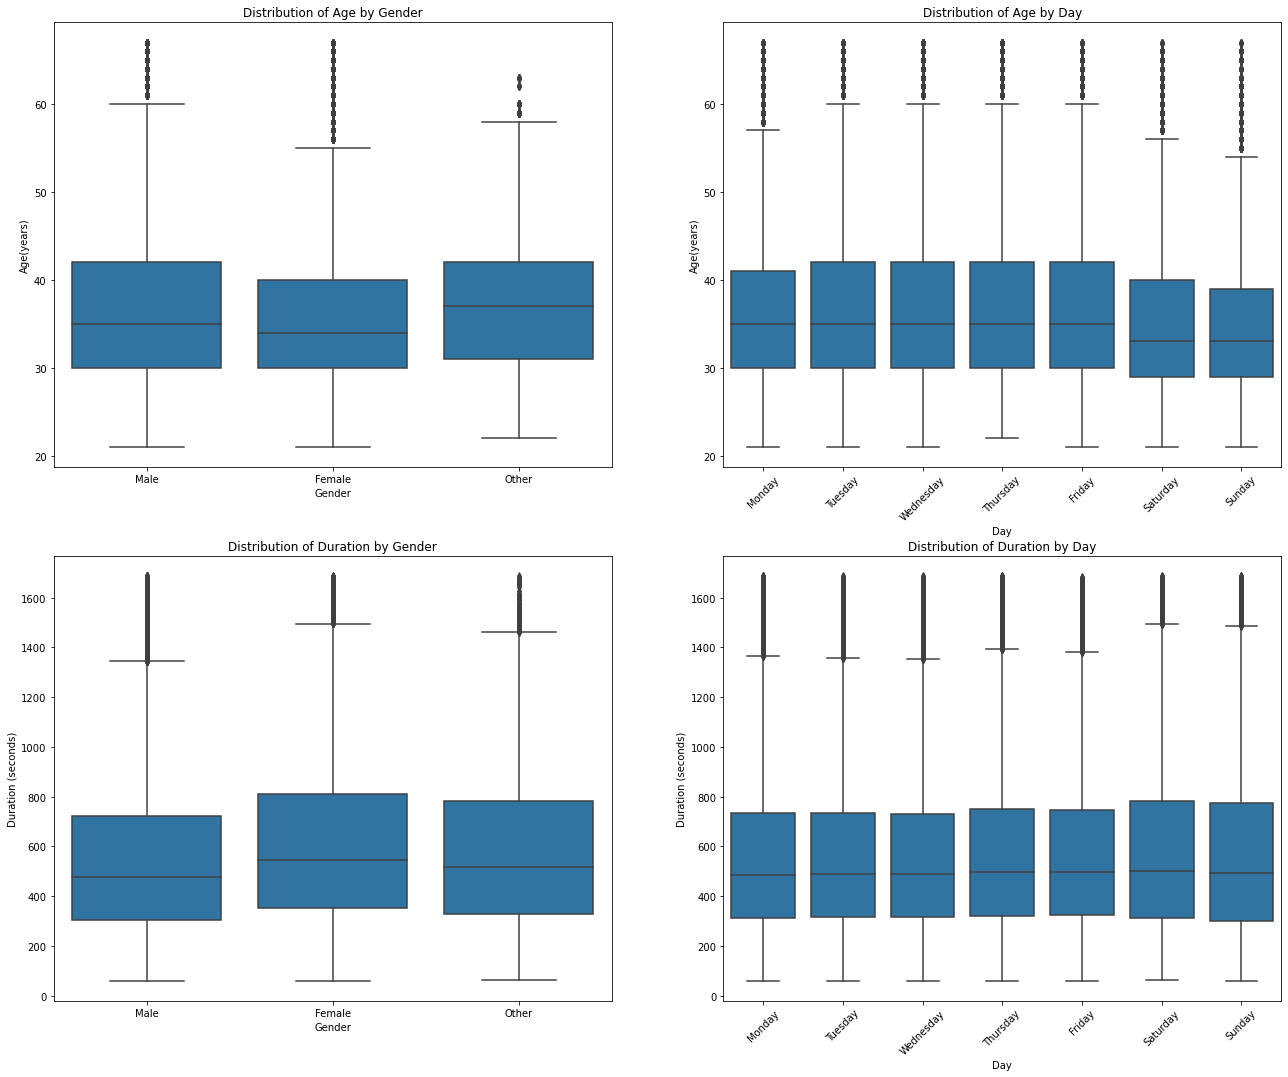

In [36]:
# boxplot will be used because we are checking the relationship between a quantitative and qualitative data
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize = [22, 18])

#Age vs Gender
plt.subplot(2, 2, 1) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "member_gender", y = "age", color = default_color);
x_y_t('Gender','Age(years)',"Distribution of Age by Gender")

#Age and day
plt.subplot(2, 2, 2) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "weekday", y = "age", color = default_color, order=day);
plt.xticks(rotation=45)
x_y_t('Day','Age(years)',"Distribution of Age by Day")


#Duration vs Gender 
plt.subplot(2, 2, 3) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "member_gender", y = "duration_sec", color = default_color);
x_y_t('Gender','Duration (seconds)',"Distribution of Duration by Gender")


#Duration vs day
plt.subplot(2, 2, 4) 
default_color = sb.color_palette()[0]
sb.boxplot(data = df_copy, x = "weekday", y = "duration_sec", color = default_color, order=day);
plt.xticks(rotation=45)
x_y_t('Day', 'Duration (seconds)',"Distribution of Duration by Day")

plt.show()


Age
- There is a drop in ageof bike usage on weekdends
- Although there are more male, female riders are younger

Duration
- Interestingly, male riders tend to have shorter trips compared to female users.
- Trip duration is longer during weekends



> Lets explore the relationship between the numerical variables 
#### Age vs Duration

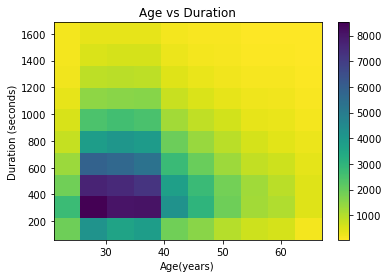

In [37]:
#since both numeric values are discrete, heat map will be used 
# Use cmap to reverse the color map. 
plt.hist2d(data = df_copy, x = 'age', y = 'duration_sec', cmap='viridis_r')
plt.colorbar()
x_y_t('Age(years)', 'Duration (seconds)',"Age vs Duration")
plt.show()

> Expectedly, riders between the age of 25 and 40 tend to spend longer trip duration. It wou;d be interesting to see how user type affects this

> Lets explore the relationship between the other categorical variables

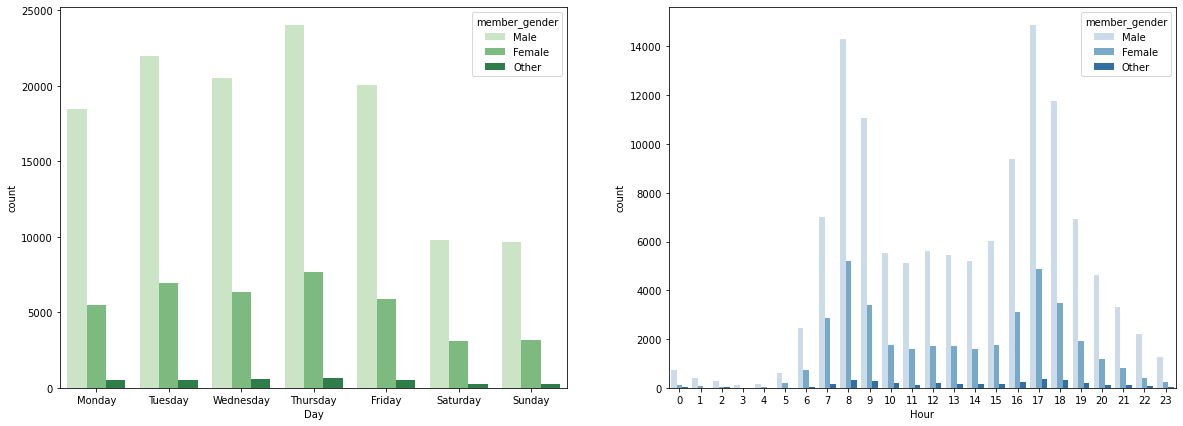

In [56]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = [str(x) for x in np.arange(0,24,1)]

plt.figure(figsize = [20, 7]) 


#Day by Gender by count
plt.subplot(1, 2, 1)
sb.countplot(data = df_copy, x = 'weekday', hue = 'member_gender', palette = 'Greens', order=day );
plt.xlabel('Day')
plt.ylabel('count')

#Hour by user count
plt.subplot(1, 2, 2) 
sb.countplot(data = df_copy, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues', order=hour_order)
plt.xlabel('Hour')
plt.ylabel('count')


plt.show()

The proportion of the male and female looks the same across time

## Multivariate Exploration

>The main interest here is to exlplore further how user type affects the age, duration and time. I have established from previous plots that customers take longer trip than subscribers. This section should shed more light as to what the causation is.
#### Why do customers take longer trip compared to subscribers?

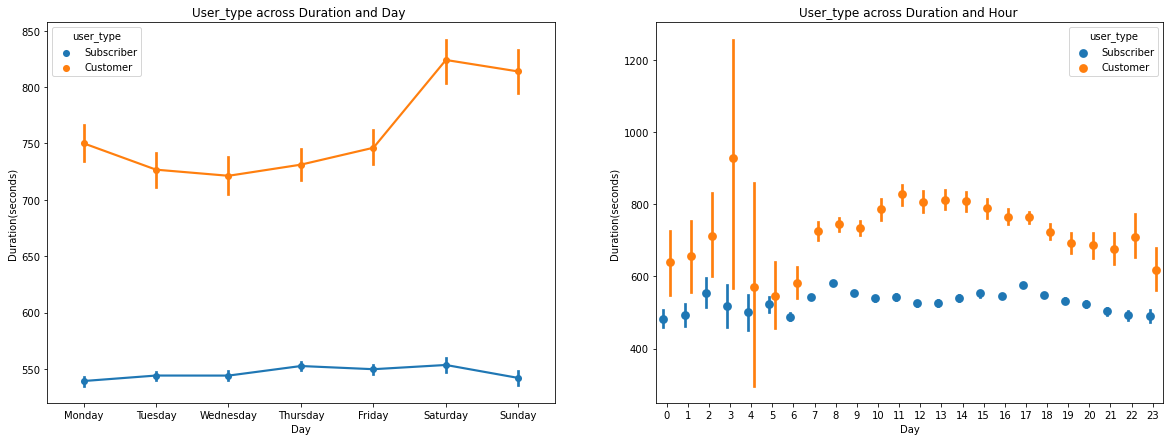

In [44]:
plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1) 
sb.pointplot(data=df_copy, x='weekday', y='duration_sec' , hue = 'user_type', scale=.8, order=day);
x_y_t('Day', 'Duration(seconds)', 'User_type across Duration and Day ')

plt.subplot(1, 2, 2) 
ax = sb.pointplot(data=df_copy, x='start_time_hour', y='duration_sec', hue = 'user_type', dodge=0.3, linestyles="",
                  order=hour_order);
x_y_t('Day', 'Duration(seconds)', 'User_type across Duration and Hour ')

plt.show()

> There is an increase in the trip duration on Saturday even for Subscribers. While the trip duration is significant on weekends for customers. There are lots of outliers in the early hours, however there seem to be an inverse relationship in the hours of trip

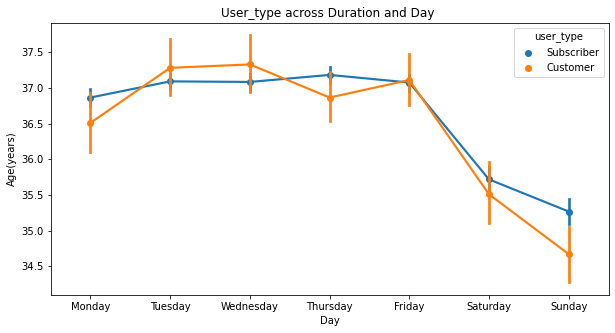

In [45]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(10, 5))

sb.pointplot(data=df_copy, x='weekday', y='age' , hue = 'user_type', scale=.8, order=day);
x_y_t('Day', 'Age(years)', 'User_type across Duration and Day ')
#plt.grid()
plt.show()

> There are similarities in the age distribution of both user type, particularly the decline in age on weekends.

#### Time Count for each users

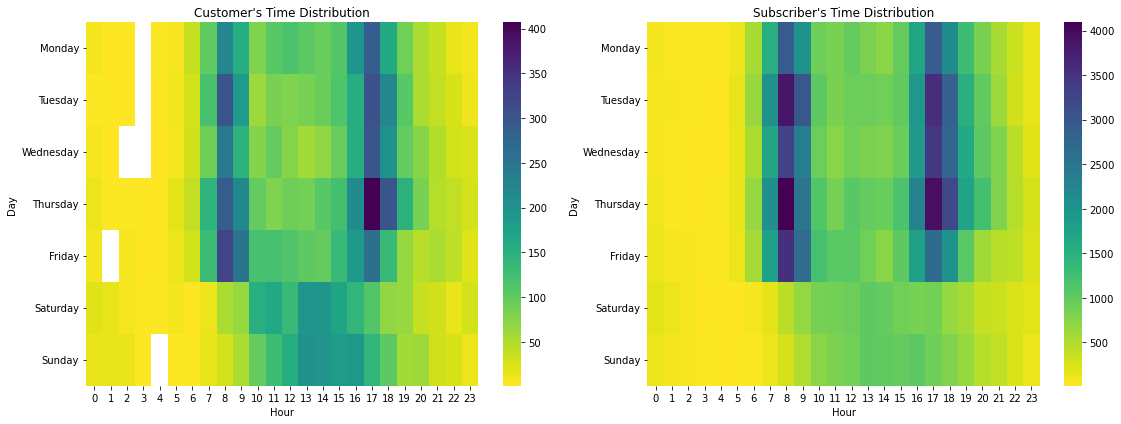

In [54]:
plt.figure(figsize = (16,6))

hour_order = [str(x) for x in np.arange(0,24,1)]
plt.subplot(1, 2, 1)
df_customers = df_copy[df_copy['user_type']=='Customer']
count1 = df_customers.groupby(['weekday', 'start_time_hour']).size().reset_index(name='count')
count1  = count1 .pivot(index='weekday', columns='start_time_hour', values='count')[hour_order].reindex(day)
sb.heatmap(count1, cmap='viridis_r');
x_y_t('Hour', 'Day', "Customer's Time Distribution")

plt.subplot(1, 2, 2)
df_subscribers = df_copy[df_copy['user_type']=='Subscriber']
count2 = df_subscribers.groupby(['weekday', 'start_time_hour']).size().reset_index(name='count')
count2  = count2 .pivot(index='weekday', columns='start_time_hour', values='count')[hour_order].reindex(day)
sb.heatmap(count2, cmap='viridis_r');
x_y_t('Hour', 'Day', "Subscriber's Time Distribution")

plt.tight_layout()

> While there are similaries in counts, its shown that for Customers, there are more trip rides on saturdays and sundays particularly between 10am and 5pm.

#### How long does each user type take trips accross different ages?

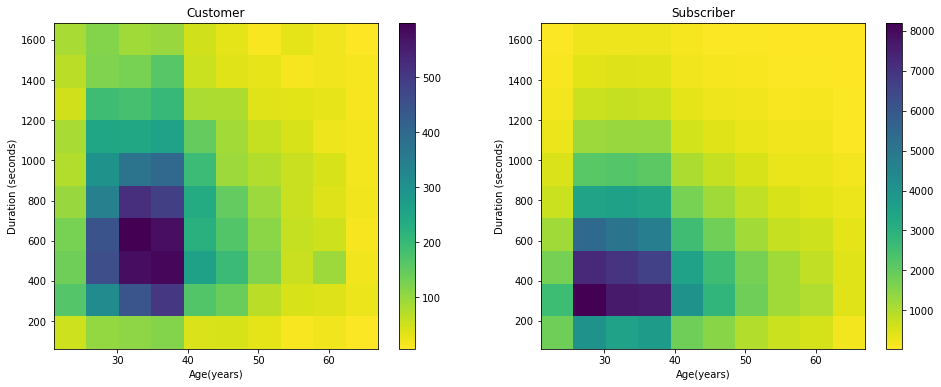

In [89]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.hist2d(data = df_copy[df_copy['user_type']=='Customer'], x = 'age', y = 'duration_sec', cmap='viridis_r')
plt.colorbar()
x_y_t('Age(years)', 'Duration (seconds)',"Customer")

plt.subplot(1,2,2)
plt.hist2d(data = df_copy[df_copy['user_type']=='Subscriber'], x = 'age', y = 'duration_sec', cmap='viridis_r')
plt.colorbar()
x_y_t('Age(years)', 'Duration (seconds)',"Subscriber")

plt.show()

> While its is evident that the longer the trip, the younger the age. The trip duration covers more area for customers compared to subscribers. 

## Discussions 

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined.

## Conclusions

> From the univariate plots, the numeric plots(duration and age) contained outliers, and there were obvious difference in the categorical variables(user type, gender and Time). Upon further exploration for the Bivariate plots it became clear that trip durations increased on weekends and age decreased on weekends. Also the count of trips by user type indicates that a relative equal trip count for customers, However upon further investigation with multivariate plot. It became evident that trip duration for subcribers are relatively the same and short but increase for customers on weekends and longer trip duration. 
Suprisingly there were longer trip duration at odd hours (2am to 3am).